In [1]:
import pandas as pd

from model import HModel

In [2]:
CRED_THR = 45.0

In [3]:
# Load the metadata
# Load user metadata (used for Popularity metric)
# NOTE: Dtype are specified due a warning about 'mixed data'
dtype = {'user_id': str,
         'user_screen_name': str,
         'name': str,
         'verified': str,
         'protected': str,
         'location': str,
         'description': str}

user_data_df = pd.read_csv("data/final_users_new.csv", parse_dates=[1], dtype=dtype)

In [4]:
user_data_df

,user_id,created_at,user_screen_name,name,nbr_followers,nbr_followings,nbr_liked_tweets,nbr_lists,nbr_tweets,verified,protected,location,description,nbr_accounts,nbr_usernames
0,1338507058551943171,2020-12-14 15:32:19+00:00,natAfrica1,Nature Africa,325.0,0.0,0.0,1.0,0.0,False,False,NaN,"Bringing you the latest science news, features...",1.0,1.0
1,380749300,2011-09-27 05:02:03+00:00,Apple,Apple,5821968.0,0.0,0.0,10925.0,0.0,True,False,"Cupertino, CA",http://Apple.com,1.0,1.0
2,1179147907188043776,2019-10-01 21:35:50+00:00,david25342,david2534,0.0,11.0,2.0,0.0,1.0,False,False,NaN,NaN,1.0,1.0
3,1340056522597019648,2020-12-18 22:09:17+00:00,AnnaLauraMasci1,Anna Laura Masciopinto,1.0,10.0,0.0,0.0,1.0,False,False,NaN,NaN,1.0,1.0
4,1408886954566037506,2021-06-26 20:37:08+00:00,NicolaG86861424,Nicola Gentile,0.0,5.0,0.0,0.0,1.0,False,False,NaN,NaN,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166141,139103913,2010-05-01 15:11:38+00:00,HernanPorrasM,Hernán Porras Molina,50736.0,9548.0,3746.0,496.0,3771762.0,False,False,"Miami, FL",Director de http://Entornointeligente.com y CE...,1.0,1.0
1166142,120421476,2010-03-06 11:22:06+00:00,kakusan_RT,拡散RT,20825.0,1.0,23.0,514.0,3899871.0,False,False,日本,「拡散」が含まれるツイートをRTするbotです。お問い合わせは本アカウントの固定ツイートまた...,1.0,1.0
1166143,109260511,2010-01-28 13:32:03+00:00,ja8yum,Kinn-san,7318.0,5096.0,871.0,234.0,3941873.0,False,False,北海道北見市北見,"重度の化学物質(Na,Cl)アレルギー症発症で、2006年4月30日に29年間のサラリーマン...",1.0,1.0
1166144,124172948,2010-03-18 14:02:00+00:00,la_patilla,La Patilla,7063943.0,173.0,596.0,15393.0,5747076.0,True,False,Venezuela,Información e Investigación. \nDESCARGA NUESTR...,1.0,1.0


In [5]:
# Build a node ranking by degree (num followers)
followers_gt = user_data_df[['user_id', 'nbr_followers']].sort_values(by='nbr_followers', ascending=False).dropna()
followers_gt['nbr_followers'] = followers_gt['nbr_followers'].astype(int)
followers_gt.set_index('user_id', inplace=True)
followers_gt

,nbr_followers
user_id,
813286,130046435
27260086,114019871
79293791,100243534
155659213,90135705
25073877,88779101
...,...
1417955529553551361,0
1175910335754248192,0
2727304688,0


In [6]:
# followers_gt.itertuples(index=False).__next__()

## Data Load

In [7]:
# Load the data (observation or full dataset?)
# Load retweets (observation period)
dtype = {'tweet_id': str,
         'user_id': str,
         'retweeted_user_id': str,
         'retweeted_status_id': str}

observation_df = pd.read_csv("data/observation_plus_evaluation_retweets.csv", parse_dates=[1], dtype=dtype)

observation_df

,tweet_id,created_at,user_id,retweeted_user_id,retweeted_status_id,retweet_count,likes_count,retweeted_text,root_domains,newsguard_rating
0,1340468299025551360,2020-12-20 01:25:21+00:00,497188910,1017807360075665408,1340325850378592257,4,0,@GagliardoneS @amnesia96225614 https://t.co/L3...,affaritaliani.it,64.5
1,1340468728534884354,2020-12-20 01:27:04+00:00,924336025387913221,NaN,NaN,0,0,NaN,lastampa.it,95.0
2,1340473042129080320,2020-12-20 01:44:12+00:00,47148805,NaN,NaN,0,0,NaN,nytimes.com,100.0
3,1340474125656190978,2020-12-20 01:48:31+00:00,1022891525242593280,NaN,NaN,1,3,NaN,imolaoggi.it,5.0
4,1340477947627581440,2020-12-20 02:03:42+00:00,908206586,NaN,NaN,0,0,NaN,repubblica.it tweetedtimes.com,95.0
...,...,...,...,...,...,...,...,...,...,...
827225,1451536212381011970,2021-10-22 13:09:35+00:00,1329549977463508993,4758512368,1450461737895989261,0,0,"Australia, Djokovic contro i media: “È terrifi...",stopcensura.online,39.5
827226,1451536215858155528,2021-10-22 13:09:36+00:00,1446561632105205774,1446561632105205774,1451536139131801605,0,0,SE DICCESSE 14 MILIONI DI NON VACCINATI IL GOV...,tgcom24.mediaset.it,82.5
827227,1451536226876526601,2021-10-22 13:09:39+00:00,712365073,1173682089637625856,1451310094461947909,0,0,"Pericardite dopo il vaccino, testimonianza del...",lapekoranera.it,12.5
827228,1451536327388942348,2021-10-22 13:10:03+00:00,1036611673,1260895357548068865,1451536158098399236,0,0,"I vaccinati per forza non la prenderanno bene,...",maurizioblondet.it,20.0


In [8]:
# Format the data to feed the model
model_input_df = observation_df[['tweet_id', 'user_id', 'retweeted_status_id', 'created_at', 'newsguard_rating']].copy()
model_input_df.newsguard_rating = (model_input_df.newsguard_rating <= CRED_THR).astype(int)
model_input_df.retweeted_status_id.fillna('ORIGIN', inplace=True)
data = list(model_input_df.itertuples(index=False))

In [9]:
# Init and train the model
fib_model = HModel(content_key=lambda x: x[0],
                   author_key=lambda x: x[1],
                   root_content_key=lambda x: x[2],
                   timestamp_key=lambda x: x[3],
                   flag_key=lambda x: x[4])

fib_model.fit(data) # NOTE: Don't use time_fit (will reset the author2coauthors structure at each time frame)

In [10]:
# Rank by estimated number of followers
ranking = sorted(list(fib_model.author2features.items()), key=lambda x: x[1]['co-authors'], reverse=True)
#ranking_df = pd.DataFrame.from_dict({k: v['co-authors'] for k, v in ranking}, orient='index', columns=['nbr_followers'])

In [11]:
#{k: v['FIB-index'] for k, v in fib_model.author2features.items()}

In [12]:
estimated_degree_rank = {k: v['co-authors'] for k, v in ranking}
ground_truth_degree_rank = followers_gt.to_dict()['nbr_followers']

In [13]:
# Compare rankings
estimated_degree_rank

{'25676606': 2326,
 '331617619': 2196,
 '1683455144': 1858,
 '18935802': 1692,
 '420351046': 1475,
 '1248216384577953792': 1468,
 '1032615842': 1084,
 '133790890': 1061,
 '14060262': 993,
 '245969509': 990,
 '4758512368': 987,
 '1322629376421355521': 828,
 '36079217': 739,
 '1072167411984551936': 676,
 '52424550': 648,
 '1935534786': 484,
 '726721856749842436': 484,
 '1063806444380798976': 463,
 '13514762': 451,
 '365462238': 439,
 '1940288287': 421,
 '1289758279250452480': 418,
 '33284443': 416,
 '473801195': 414,
 '454365633': 406,
 '1620487452': 398,
 '432637066': 390,
 '1006071437168390144': 366,
 '1050141832758341632': 357,
 '761787475': 356,
 '862970692958138368': 330,
 '82886693': 329,
 '472966889': 323,
 '117701249': 312,
 '1343955493212065794': 305,
 '1241675979929661442': 303,
 '283416650': 301,
 '500882938': 299,
 '150725695': 292,
 '1173682089637625856': 289,
 '1359758912174645249': 285,
 '221681749': 282,
 '17007782': 264,
 '78567974': 262,
 '188270789': 261,
 '13338849822

In [14]:
ground_truth_degree_rank

{'813286': 130046435,
 '27260086': 114019871,
 '79293791': 100243534,
 '155659213': 90135705,
 '25073877': 88779101,
 '17919972': 88630733,
 '14230524': 83647965,
 '18839785': 72146208,
 '25365536': 69770100,
 '23375688': 64931870,
 '428333': 61528494,
 '44196397': 59105951,
 '16409683': 56081016,
 '50393960': 55577966,
 '759251': 55008432,
 '807095': 50765281,
 '23083404': 49701511,
 '5402612': 48206706,
 '11348282': 45894812,
 '85603854': 45047995,
 '105119490': 41280923,
 '471741741': 40594782,
 '335141638': 39775677,
 '26257166': 38216720,
 '84279963': 35878057,
 '158314798': 34750612,
 '19923144': 34625724,
 '1409798257': 33508629,
 '742143': 33022691,
 '1339835893': 30965513,
 '176566242': 30894919,
 '939091': 30519704,
 '379408088': 26481963,
 '17471979': 26331345,
 '5988062': 25759624,
 '1447949844': 25074217,
 '1652541': 23917211,
 '35787166': 22982619,
 '20536157': 22950923,
 '168683422': 22370511,
 '19248106': 21814125,
 '23573083': 20709223,
 '1367531': 20350432,
 '33884545

In [15]:
deg_compare = {}
for author, estimated_degree in estimated_degree_rank.items():
    deg_compare[author] = [estimated_degree, ground_truth_degree_rank[author]]

In [16]:
deg_compare

{'25676606': [2326, 536150],
 '331617619': [2196, 1186171],
 '1683455144': [1858, 23614],
 '18935802': [1692, 3191161],
 '420351046': [1475, 1580447],
 '1248216384577953792': [1468, 2560],
 '1032615842': [1084, 81723],
 '133790890': [1061, 658409],
 '14060262': [993, 1122653],
 '245969509': [990, 38734],
 '4758512368': [987, 7140],
 '1322629376421355521': [828, 17999],
 '36079217': [739, 467226],
 '1072167411984551936': [676, 76954],
 '52424550': [648, 2079442],
 '1935534786': [484, 27710],
 '726721856749842436': [484, 11508],
 '1063806444380798976': [463, 9723],
 '13514762': [451, 186171],
 '365462238': [439, 329659],
 '1940288287': [421, 13177],
 '1289758279250452480': [418, 5204],
 '33284443': [416, 9863],
 '473801195': [414, 7957],
 '454365633': [406, 18659],
 '1620487452': [398, 6679],
 '432637066': [390, 9807],
 '1006071437168390144': [366, 11806],
 '1050141832758341632': [357, 5423],
 '761787475': [356, 17486],
 '862970692958138368': [330, 3067],
 '82886693': [329, 268199],
 '47

In [17]:
def min_max_scale_col(df, column_name):
    x_min = df[column_name].min()
    x_max = df[column_name].max()
    df[column_name] = (df[column_name] - x_min) / (x_max - x_min)

In [18]:
deg_compare_df = pd.DataFrame.from_dict(deg_compare, orient='index', columns=['estimated', 'ground_truth'])
#deg_compare_df['ground_truth'] = deg_compare_df['ground_truth'] / deg_compare_df['ground_truth'].max()
#min_max_scale_col(deg_compare_df, 'ground_truth')
#deg_compare_df['estimated'] = deg_compare_df['estimated'] / deg_compare_df['estimated'].max()
#min_max_scale_col(deg_compare_df, 'estimated')
deg_compare_df.sort_values(by='ground_truth', inplace=True, ascending=False)
deg_compare_df.reset_index(inplace=True)

In [19]:
deg_compare_df

,index,estimated,ground_truth
0,24744541,0,9407677
1,8350912,0,3446452
2,5893702,19,3303533
3,18935802,1692,3191161
4,133663801,16,3162270
...,...,...,...
39111,1407007600563064835,0,0
39112,1351539529606459392,0,0
39113,1137819350495350784,0,0
39114,1086364410636103681,0,0


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

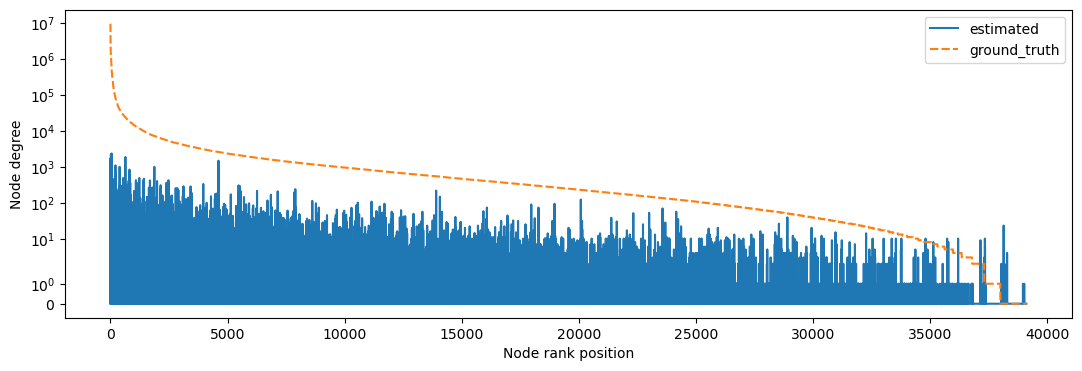

In [21]:
plt.subplots(figsize=(13, 4))

ax = sns.lineplot(data=deg_compare_df)#.iloc[100:])

#plt.xscale('symlog')
plt.yscale('symlog')

ax.set_ylabel("Node degree");
ax.set_xlabel("Node rank position");



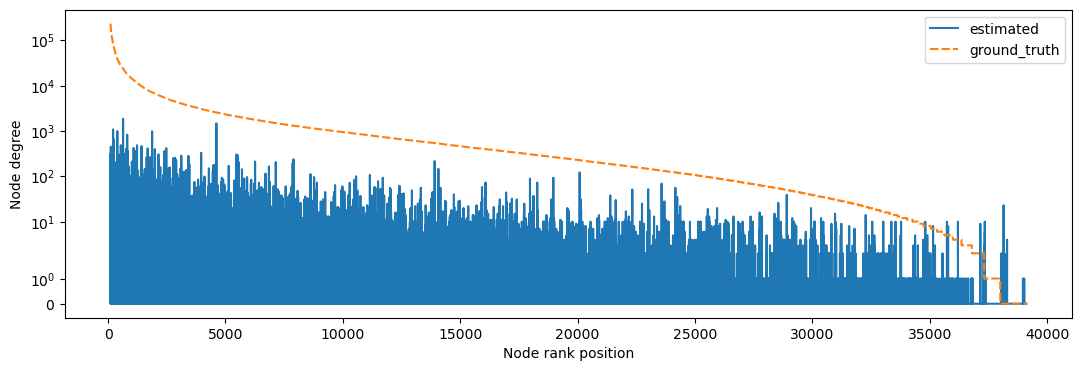

In [22]:
plt.subplots(figsize=(13, 4))

ax = sns.lineplot(data=deg_compare_df.iloc[100:])

#plt.xscale('symlog')
plt.yscale('symlog')

ax.set_ylabel("Node degree");
ax.set_xlabel("Node rank position");
